In [24]:
import pandas as pd 
import numpy as np 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv') #loading dataset

In [3]:
df.head() 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
numeric_cols = df.select_dtypes(include=np.number) #seperating numeric and categorical data 
categorical_cols = df.select_dtypes(exclude=np.number)

In [9]:
numeric_imputer = SimpleImputer(strategy='mean') #handle missing values if any for numeric data 
df[numeric_cols.columns] = numeric_imputer.fit_transform(df[numeric_cols.columns])

In [10]:
categorical_imputer = SimpleImputer(strategy='most_frequent') #handle any missing values if any for categorical data 
df[categorical_cols.columns] = categorical_imputer.fit_transform(df[categorical_cols.columns])

In [13]:
label_encoders = {} #label encoding(categorical values)
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [14]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0.0,1.0,4,25.19,6.6,140.0,0.0
1,0,54.0,0.0,0.0,0,27.32,6.6,80.0,0.0
2,1,28.0,0.0,0.0,4,27.32,5.7,158.0,0.0
3,0,36.0,0.0,0.0,1,23.45,5.0,155.0,0.0
4,1,76.0,1.0,1.0,1,20.14,4.8,155.0,0.0


In [19]:
#data segmentation and training 
X = df.drop(columns=['diabetes'])
y = df['diabetes']

In [20]:
#split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
#cross validation with 5-fold 
classifier = SGDClassifier()  
cross_val_scores = cross_val_score(classifier, X_train, y_train, cv=5)

In [23]:
print("Cross-validation scores:", cross_val_scores) #print the cv results for observation
print("Mean CV accuracy:", np.mean(cross_val_scores))

Cross-validation scores: [0.93835714 0.9455     0.96057143 0.9225     0.95035714]
Mean CV accuracy: 0.9434571428571428


In [25]:
#Model 
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50), (50, 100)],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 1500, 2000],
}

In [26]:
grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)

In [28]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(100,), (50, 50), (100, 50),
                                                (50, 100)],
                         'max_iter': [1000, 1500, 2000]})

In [29]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'alpha': 0.001, 'hidden_layer_sizes': (50, 100), 'max_iter': 1000}


In [31]:
best_model = grid_search.best_estimator_

In [32]:
#Model evaluation 
y_pred = best_model.predict(X_test) # make predictions on test set 

In [33]:
accuracy = accuracy_score(y_test, y_pred) #print accuracy on test data
print("Test set accuracy:", accuracy)

Test set accuracy: 0.9684333333333334


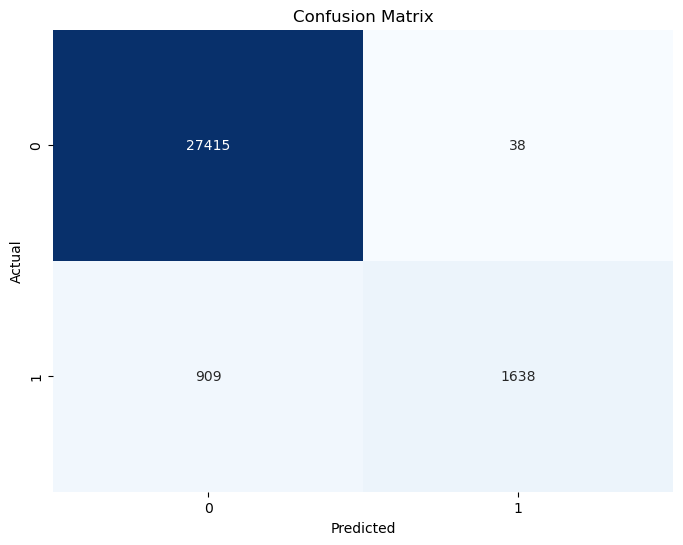

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[27415    38]
 [  909  1638]]


In [42]:
#Using SGD(as given in the journal paper)
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],  # Loss function
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization strength
    'max_iter': [1000, 1500, 2000],  # Maximum number of iterations
    'penalty': ['l2', 'l1', 'elasticnet'],  # Penalty term
}

In [43]:
grid_search = GridSearchCV(SGDClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)

In [44]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'log', 'modified_huber'],
                         'max_iter': [1000, 1500, 2000],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [45]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'elasticnet'}


In [46]:
best_sgd_model = grid_search.best_estimator_

In [55]:
y_pred_sgd = best_sgd_model.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print("Test set accuracy (SGD):", accuracy_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd)
recall_sgd = recall_score(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd)

print("Precision (SGD):", precision_sgd)
print("Recall (SGD):", recall_sgd)
print("F1 Score (SGD):", f1_sgd)

# Generate a classification report
classification_report_result = classification_report(y_test, y_pred_sgd)
print("Classification Report (SGD):\n", classification_report_result)

Test set accuracy (SGD): 0.9574333333333334
Precision (SGD): 0.9029187817258884
Recall (SGD): 0.5586965056929721
F1 Score (SGD): 0.690274072277468
Classification Report (SGD):
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     27453
         1.0       0.90      0.56      0.69      2547

    accuracy                           0.96     30000
   macro avg       0.93      0.78      0.83     30000
weighted avg       0.96      0.96      0.95     30000



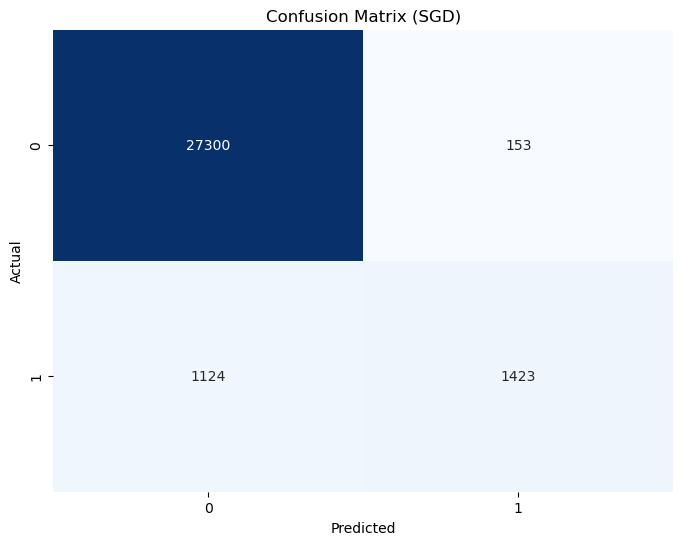

In [56]:
confusion = confusion_matrix(y_test, y_pred_sgd)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SGD)')
plt.show()

In [48]:
#My model 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [49]:
accuracy_sgd = accuracy_score(y_test, y_pred)
print("Accuracy (SGD):", accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)

print("Precision (SGD):", precision)
print("Recall (SGD):", recall)
print("F1 Score (SGD):", f1)

classification_report_result = classification_report(y_test, y_pred)
print("Classification Report (SGD):\n", classification_report_result)


Accuracy (SGD): 0.9684333333333334
Precision (SGD): 0.977326968973747
Recall (SGD): 0.6431095406360424
F1 Score (SGD): 0.7757518351882547
Classification Report (SGD):
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     27453
         1.0       0.98      0.64      0.78      2547

    accuracy                           0.97     30000
   macro avg       0.97      0.82      0.88     30000
weighted avg       0.97      0.97      0.97     30000

